## Imports

In [1]:
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import numpy as np
import math

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from mpl_toolkits.mplot3d import Axes3D

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino'], 'size':22})
rc('text', usetex=True)

%matplotlib inline

# local figure path
image_path="/Users/heidihurst/Documents/UK/ucl-gis/dissertation/screenshots_images/"
# latex project figure path
# image_path= "/Users/heidihurst/Documents/UK/ucl-gis/dissertation/writeup/16819348ghkbpztpjpfj/Figures/"

In [2]:
# color scheme
main_color='#1d7568'
secondary_color='#49b8a8'
tertiary_color='#C0e5df'
accent_color='#EE6434'
accent_secondary_color='#F49030'
accent_tertiary_color='#FCBB44'

# alpha value for figures
alpha=0.7

figsize=(4,3)
# fs125=(4*1.25,3*1.25)
fs125=(4,3)

name={"t7":"Downsample ($\mathtt{t1}$)","t9":"Upsample ($\mathtt{t2}$)"}

In [3]:
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

## File Ingest and Processing

In [4]:
# create 07 and 09 separately
def create_ap(trial):
    csv_path = '/Users/heidihurst/Documents/UK/ucl-gis/dissertation/analysis/car_{}_performance.csv'.format(trial)
    performance = pd.read_csv(csv_path, names=["df", "IOU", "MAP", "MAP Score", "MAF", "F1"])
    ap = performance[performance["IOU"] == 0.5]
    return(ap)

In [5]:
# ingest AP data
ap07 = create_ap("t7")
ap09 = create_ap("t9")

In [6]:
def prep_bbox(trial):
    # create path
    t_path = "../analysis/{}_bbox_summary.csv".format(trial)
    # read in csv to df
    t = pd.read_csv(t_path)
    # rename columns
    t = t.rename(columns={"Unnamed: 0":"trial", "Unnamed: 1":"stat"})
    # create df colum
    t['df'] = [x[x.rfind("_")+1:] for x in t['trial']]
    # get median values and sort
    med = t[t['stat']=="50%"]
    med = med.sort_values(by='df')
    return(med)

In [7]:
def full_bbox_info(trial):
    # create path
    t_path = "../analysis/{}_bbox_summary.csv".format(trial)
    # read in csv to df
    t = pd.read_csv(t_path)
    # rename columns
    t = t.rename(columns={"Unnamed: 0":"trial", "Unnamed: 1":"stat"})
    # create df colum
    t['df'] = [x[x.rfind("_")+1:] for x in t['trial']]
    # get median values and sort
#     med = t[t['stat']=="50%"]
#     med = med.sort_values(by='df')
    return(t)

In [8]:
# ingest bbox size data
med07=prep_bbox("t7")
med09=prep_bbox("t9")

In [9]:
# t7 combine data
med07['df'] = pd.to_numeric(med07['df'])
ap07['df'] = pd.to_numeric(ap07['df'])
total07 = ap07.merge(med07, on="df")
t07 = total07.loc[:,["df","MAP","area"]]

In [10]:
# t9 combine data
med09['df'] = pd.to_numeric(med09['df'])
ap09['df'] = pd.to_numeric(ap09['df'])
total09 = ap09.merge(med09, on="df")
t09 = total09.loc[:,["df","MAP"]]

### Ingest & Processing for Single File

In [11]:
# read in csv file of information
trial="t7"
csv_path = '/Users/heidihurst/Documents/UK/ucl-gis/dissertation/analysis/car_{}_performance.csv'.format(trial)
performance07 = pd.read_csv(csv_path, names=["df", "IOU", "MAP", "MAP Score", "MAF", "F1"])

trial="t9"
csv_path = '/Users/heidihurst/Documents/UK/ucl-gis/dissertation/analysis/car_{}_performance.csv'.format(trial)
performance09 = pd.read_csv(csv_path, names=["df", "IOU", "MAP", "MAP Score", "MAF", "F1"])

### MAP by IOU (Separate)

In [11]:
# # figure for trial t7
# plt.figure()
# plt.rcParams["figure.figsize"] = (10,4)
# for i in range(7):
#     plt.subplot(240 + (i+1))
#     toplot = performance07[performance07["df"] == (i+2)*0.5]
#     plt.plot(toplot["IOU"], toplot["MAP"])
#     plt.title("MAP by IOU for df {}".format((i+2)*0.5))

In [12]:
# # figure for each MAP by IOU for trial t9
# plt.figure()
# plt.rcParams["figure.figsize"] = (10,4)
# for i in range(7):
#     plt.subplot(240 + (i+1))
#     toplot = performance09[performance09["df"] == (i+2)*0.5]
#     plt.plot(toplot["IOU"], toplot["MAP"])
#     plt.title("MAP by IOU for df {}".format((i+2)*0.5))

### MAP by IOU (Overlaid)

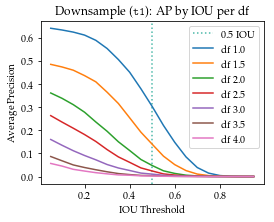

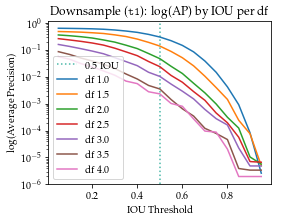

In [13]:
# MAP by IOU (Overlaid) for T7

# plot all of them on top of each other
plt.figure(figsize=fs125)
plt.axvline(x=0.5, linestyle=":",  color=secondary_color, label="0.5 IOU")
for i in range(7):
    toplot = performance07[performance07["df"] == (i+2)*0.5]
    plt.plot(toplot["IOU"], toplot["MAP"], label="df {}".format((i+2)*0.5))

plt.legend()
plt.title("{}: AP by IOU per df".format(name["t7"]))
plt.xlabel("IOU Threshold")
plt.ylabel("Average Precision")
plt.savefig(image_path+"ap_by_iou_t7", dpi=300)

# plot with log scale
plt.figure(figsize=fs125)
plt.axvline(x=0.5, linestyle=":",  color=secondary_color, label="0.5 IOU")
for i in range(7):
    toplot = performance07[performance07["df"] == (i+2)*0.5]
    plt.semilogy(toplot["IOU"], toplot["MAP"], label="df {}".format((i+2)*0.5))
plt.legend()
plt.title("{}: log(AP) by IOU per df".format(name["t7"]))
plt.xlabel("IOU Threshold")
plt.ylabel("log(Average Precision)")
plt.savefig(image_path+"logap_by_iou_t7", dpi=300)


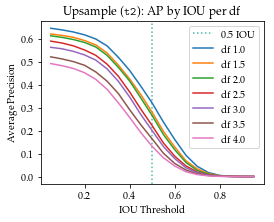

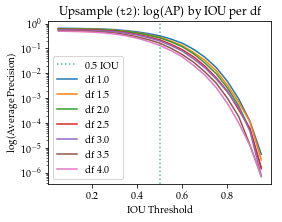

In [14]:
# MAP by IOU (Overlaid) for T9

# plot all of them on top of each other
plt.figure(figsize=fs125)
plt.axvline(x=0.5, linestyle=":",  color=secondary_color, label="0.5 IOU")
for i in range(7):
    toplot = performance09[performance09["df"] == (i+2)*0.5]
    plt.plot(toplot["IOU"], toplot["MAP"], label="df {}".format((i+2)*0.5))

plt.legend()
plt.title("{}: AP by IOU per df".format(name["t9"]))
plt.xlabel("IOU Threshold")
plt.ylabel("Average Precision")
plt.savefig(image_path+"ap_by_iou_t9", dpi=300)

# plot with log scale
plt.figure(figsize=fs125)
plt.axvline(x=0.5, linestyle=":",  color=secondary_color, label="0.5 IOU")
for i in range(7):
    toplot = performance09[performance09["df"] == (i+2)*0.5]
    plt.semilogy(toplot["IOU"], toplot["MAP"], label="df {}".format((i+2)*0.5))
plt.legend()
plt.title("{}: log(AP) by IOU per df".format(name["t9"]))
plt.xlabel("IOU Threshold")
plt.ylabel("log(Average Precision)")
plt.savefig(image_path+"logap_by_iou_t9", dpi=300)

In [15]:
# # create 1d line of best fit
# p = np.poly1d(np.polyfit(ap05["df"],ap05["MAP"],1))
# xp = np.linspace(0,5,10)

# # create an exponential best fit
# from scipy.optimize import curve_fit
# def exponential_func(x, a, b, c):
#     return a*np.exp(-b*x)+c

# if "7" in trial:
#     popt, pcov = curve_fit(exponential_func, ap05["df"], ap05["MAP"], p0=(1,1,1))
#     xx = np.linspace(0,5,100)
#     yy = exponential_func(xx, *popt)

#     sse=sum((ap05["MAP"] - exponential_func(ap05["df"],*popt))**2)
# if "9" in trial:
#     sse=sum((ap05["MAP"] - p(ap05["MAP"]))**2)
#     # alternatively, calculate with scipy
#     from scipy import stats
#     slope, intercept, r_value, p_value, std_err = stats.linregress(ap05["df"],ap05["MAP"])

In [16]:
# plt.figure(figsize=fs125)

# if "9" in trial:
#     plt.plot(xp, p(xp), linestyle=":", color=accent_color, label="Linear Best Fit")
#     plt.text(0.55, 0.145, "Equation: MAP={:0.2f}*df + {:0.2f}".format(slope, intercept))
#     plt.text(0.55, 0.130, "SSE: {:.4f}".format(std_err))
#     plt.text(0.55, 0.115, "$r^2$:{:.2f}".format(r_value**2))
#     plt.text(0.55, 0.105, "p-value:{:.2e}".format(p_value))
#     plt.xlim([0.5,4.5])
#     plt.ylim([0.1,0.35])
# if "7" in trial:
#     plt.plot(xx, yy, linestyle=":", color=accent_color, label="Exponential Best Fit")
#     plt.text(0.8,-0.02, "Sum of Squared Errors: {:.4f}".format(sse))
#     plt.text(0.8, -0.04, "Equation: $MAP={:.4f}\exp(-{:.4f}df)+{:.4f}$".format(popt[0],popt[1],popt[2]))
#     plt.xlim([0.75,4.25])
#     plt.ylim([-0.05,0.35])
    
# # plt.plot(ap05["df"], ap05["MAP"], color=secondary_color, lw=1, label='_nolegend_')
# plt.plot(ap05["df"], ap05["MAP"], color=main_color, linestyle='', marker='o', label="{}".format(name[trial]))

# plt.legend()
# plt.title("{}: AP by Downsample Factor".format(name[trial]))
# plt.xlabel("Downsample Factor")
# plt.ylabel("Average Precision")
# plt.savefig(image_path+"modeled_ap_df_{}".format(trial), dpi=300)

In [17]:
# plt.plot(ap05["df"]**2, ap05["MAP"], color=secondary_color, lw=1)
# plt.plot(ap05["df"]**2, ap05["MAP"], color=main_color, linestyle='', marker='o')
# plt.title("AP by Squared Downsample Factor")
# plt.xlabel("Squared Downsample Factor")
# plt.ylabel("Average Precision")

In [18]:
# plt.figure()
# plt.plot(ap05["df"], ap05["MAP Score"], color=secondary_color, lw=1)
# plt.plot(ap05["df"], ap05["MAP Score"], color=main_color, linestyle='', marker='o')
# plt.title("AP Score by Downsample Factor")
# plt.xlabel("Downsample Factor")
# plt.ylabel("AP Score")

In [19]:
# plt.figure()
# plt.plot(ap05["df"], ap05["MAF"], color=secondary_color, lw=1)
# plt.plot(ap05["df"], ap05["MAF"], color=main_color, linestyle='', marker='o')
# plt.title("MAF Score by Downsample Factor")
# plt.xlabel("Downsample Factor")
# plt.ylabel("MAF Score")

In [20]:
# plt.figure()
# # plt.plot(ap05["df"], ap05["F1"], color=secondary_color, lw=1)
# plt.plot(ap05["df"], ap05["F1"], color=main_color, linestyle='', marker='o')
# plt.title("F1 by Downsample Factor")
# plt.xlabel("Downsample Factor")
# plt.ylabel("F1 Score")

## BBox Size Information

In [21]:
# # formatting for latex table
diff = 100*(t09["MAP"]-t07["MAP"])/t07["MAP"]
for i in range(7):
    print("{:.1f}&{:.4f}&{:.1f}&{:.4f}&153.0&{:.1f}\% \\".format(t07["df"][i],t07["MAP"][i],t07["area"][i],
                                                             t09["MAP"][i], diff[i]) + "\\")
#     print(str(t07["df"][i]) + "&" + str(t07["MAP"][i]) + "&" + str(t07["area"][i]) + "&" + \
#           str(t09["MAP"][i]) + "& 153.0 &" + str(diff[i]) + "\\" + "\\")

1.0&0.3029&153.0&0.3198&153.0&5.6\% \\
1.5&0.1396&80.0&0.2794&153.0&100.2\% \\
2.0&0.0475&45.0&0.2653&153.0&458.2\% \\
2.5&0.0239&35.0&0.2214&153.0&824.9\% \\
3.0&0.0104&24.0&0.1997&153.0&1826.7\% \\
3.5&0.0035&20.0&0.1635&153.0&4522.1\% \\
4.0&0.0023&15.0&0.1310&153.0&5536.2\% \\


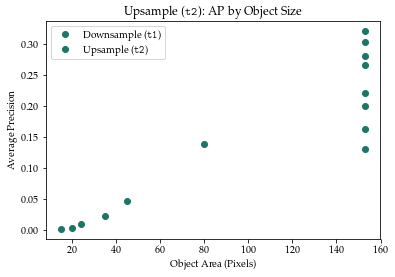

In [22]:
# plot against ap @ 0.5IOU
plt.figure()

# plt.plot(med["area"], ap05["MAP"], color=secondary_color, lw=1, label='_nolegend_')
# plt.plot(med09["area"], ap09["MAP"], color=accent_color, linestyle='', marker='s', label="Observed AP t9")
# plt.axvline(x=153, color=secondary_color, linestyle=":", label=name["t9"])
plt.plot(med07["area"], ap07["MAP"], color=main_color, linestyle='', marker='o', label=name["t7"])
plt.plot(med09["area"], ap09["MAP"], color=main_color, linestyle='', marker='o', label=name["t9"])


plt.legend()
plt.title("{}: AP by Object Size".format(name["t9"]))
plt.xlabel("Object Area (Pixels)")
plt.ylabel("Average Precision")
plt.savefig(image_path+"ap_obj_size_{}".format(trial), dpi=300)

## OLS Analysis

In [26]:
# do OLS regression for each one
from statsmodels.formula.api import ols

In [27]:
total = pd.concat([total07,total09])

In [28]:
mod = ols("MAP ~ df + area", total).fit()

In [29]:
mod.summary()

/Users/heidihurst/anaconda/envs/images27/lib/python2.7/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MAP   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     119.9
Date:                Thu, 06 Sep 2018   Prob (F-statistic):           3.40e-08
Time:                        11:05:18   Log-Likelihood:                 32.516
No. Observations:                  14   AIC:                            -59.03
Df Residuals:                      11   BIC:                            -57.12
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1116      0.027      4.073      0.002       0.051       0.172
df            -0.0450      0.008     -5.926      0.000      -0.062      -0.028
area           0.0015      0.000     11.510      0.000       0.001       0.002
==============================================================================
Omnibus:                        0.184   Durbin-Watson:                   0.646
Prob(Omnibus):                  0.912   Jarque-Bera (JB):                0.348
Skew:                           0.199   Prob(JB):                        0.840
Kurtosis:                       2.338   Cond. No.                         469.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# plot
x = np.arange(-5, 165, 10)
y = np.arange(0.5, 4.75, 0.25)
X, Y = np.meshgrid(x, y)

Z = mod.params["df"] * Y + mod.params["area"] * X + mod.params["Intercept"]
z = mod.params["df"] * y + mod.params["area"] * x + mod.params["Intercept"]
# Z = 

In [31]:
z07 = mod.params["df"] * total07["df"] + mod.params["area"] * total07["area"] + mod.params["Intercept"]
z09 = mod.params["df"] * total09["df"] + mod.params["area"] * total09["area"] + mod.params["Intercept"]

In [32]:
from matplotlib.legend_handler import (HandlerLineCollection,
                                       HandlerTuple)

from matplotlib.lines import Line2D
import matplotlib.collections as mcol

class HandlerDashedLines(HandlerLineCollection):
    """
    Custom Handler for LineCollection instances.
    """
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        # figure out how many lines there are
        numlines = len(orig_handle.get_segments())
        xdata, xdata_marker = self.get_xdata(legend, xdescent, ydescent,
                                             width, height, fontsize)
        leglines = []
        # divide the vertical space where the lines will go
        # into equal parts based on the number of lines
        ydata = ((height) / (numlines + 1)) * np.ones(xdata.shape, float)
        # for each line, create the line at the proper location
        # and set the dash pattern
        for i in range(numlines):
            legline = Line2D(xdata, ydata * (numlines - i) - ydescent)
            self.update_prop(legline, orig_handle, legend)
            # set color, dash pattern, and linewidth to that
            # of the lines in linecollection
            try:
                color = orig_handle.get_colors()[i]
            except IndexError:
                color = orig_handle.get_colors()[0]
            try:
                dashes = orig_handle.get_dashes()[i]
            except IndexError:
                dashes = orig_handle.get_dashes()[0]
            try:
                lw = orig_handle.get_linewidths()[i]
            except IndexError:
                lw = orig_handle.get_linewidths()[0]
            if dashes[0] is not None:
                legline.set_dashes(dashes[1])
            legline.set_color(color)
            legline.set_transform(trans)
            legline.set_linewidth(lw)
            leglines.append(legline)
        return leglines


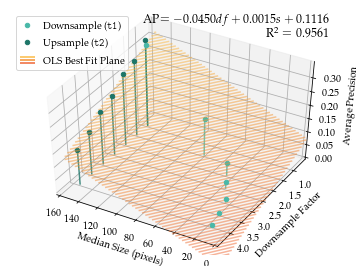

In [30]:
# from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

fig = plt.figure(figsize=(4*1.5,3*1.5))
# ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')

# ===== plot 3D fit plane ====
# plot 3D surface
# ax.plot_surface(X, Y, Z, color=accent_color, alpha=0.3,linewidth=0, antialiased=True, label="_nolegend_")

colors = [accent_tertiary_color, accent_secondary_color, accent_color]
cmap_name = "my_cmap"
my_cm = LinearSegmentedColormap.from_list(cmap_name, colors[::-1])#, N=n_bin)

ax.contour3D(X, Y, Z, 100, cmap=my_cm, alpha=0.5)#, label="_nolegend_")


# create guidelines to points to help see depth
# for i in range(len(total)):
#     ax.plot([list(total["area"])[i]]*2, [list(total["df"])[i]]*2, [list(total["MAP"])[i],0], 
#             color=main_color, alpha=0.8, label="_nolegend_")

for i in range(len(total07)):
    ax.plot([list(total07["area"])[i]]*2, [list(total07["df"])[i]]*2, [list(total07["MAP"])[i],0], 
            color=secondary_color, alpha=0.8, label="_nolegend_")
    
for i in range(len(total09)):
    ax.plot([list(total09["area"])[i]]*2, [list(total09["df"])[i]]*2, [list(total09["MAP"])[i],0], 
            color=main_color, alpha=0.8, label="_nolegend_")

t7 = ax.scatter(total07["area"], total07["df"], total07["MAP"], color=secondary_color, depthshade=False, label=name["t7"])
t9 = ax.scatter(total09["area"], total09["df"], total09["MAP"], color=main_color, depthshade=False, label=name["t9"])

# side guidelines
# ax.plot(t09["df"], z09, zdir='x', zs=160, color=main_color, linestyle=":",label="_nolegend_")
# ax.plot(total09["area"], z09, zdir='y', zs=0.5, color=main_color, linestyle=":",label="_nolegend_")

# ax.plot(t07["df"], z07, zdir='x', zs=160, color=secondary_color, linestyle="-.",label="_nolegend_")
# ax.plot(t07["area"], z07, zdir='y', zs=0.5, color=secondary_color, linestyle="-.",label="_nolegend_")

# set limits etc
ax.set_xlim([0,160])
ax.set_ylim([0.5,4.5])
ax.set_yticks([1,1.5,2,2.5,3,3.5,4])
ax.set_zlim([0,0.35])

# ax.view_init(35,-70)
ax.view_init(45,120)

ax.set_xlabel("Median Size (pixels)")
ax.set_ylabel("Downsample Factor")
ax.set_zlabel("Average Precision")

# create proxy line group
line = [[(0, 0)]]
lc = mcol.LineCollection(3 * line, linestyles='solid', colors=colors)#accent_secondary_color)

ax.legend([t7, t9, lc], [name['t7'], name['t9'], 'OLS Best Fit Plane'], loc=2, 
          handler_map={type(lc): HandlerDashedLines()},
          handlelength=1.5, handleheight=1.5)

# ax.legend(loc=2)

ax.text2D(0.95,0.95,"AP$={:.4f}df+{:.4f}s+{:.4f}$".format(mod.params["df"],mod.params["area"],mod.params["Intercept"]), 
          transform=ax.transAxes, horizontalalignment='right', fontsize=12)
ax.text2D(0.95,0.89, "R$^2={:.4f}$".format(mod.rsquared),
         transform=ax.transAxes, horizontalalignment='right', fontsize=12)

plt.savefig(image_path + "ols_3d_full", dpi=300)



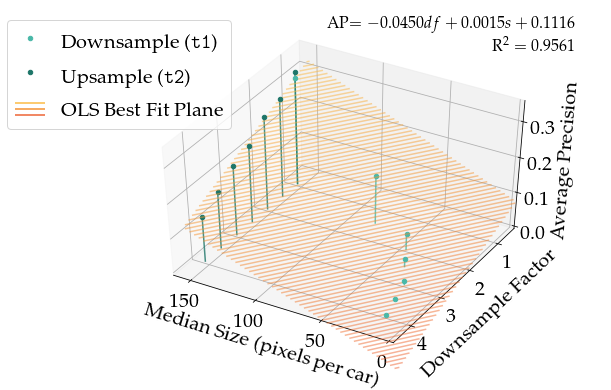

In [77]:
# from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True, 'font.size':20})

# fig = plt.figure(figsize=(4*1.5,3*1.5))
fig = plt.figure(figsize=cm2inch(20.3,14.8))
# ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')

# ===== plot 3D fit plane ====
# plot 3D surface
# ax.plot_surface(X, Y, Z, color=accent_color, alpha=0.3,linewidth=0, antialiased=True, label="_nolegend_")

colors = [accent_tertiary_color, accent_secondary_color, accent_color]
cmap_name = "my_cmap"
my_cm = LinearSegmentedColormap.from_list(cmap_name, colors[::-1])#, N=n_bin)

ax.contour3D(X, Y, Z, 100, cmap=my_cm, alpha=0.5)#, label="_nolegend_")


# create guidelines to points to help see depth
# for i in range(len(total)):
#     ax.plot([list(total["area"])[i]]*2, [list(total["df"])[i]]*2, [list(total["MAP"])[i],0], 
#             color=main_color, alpha=0.8, label="_nolegend_")

for i in range(len(total07)):
    ax.plot([list(total07["area"])[i]]*2, [list(total07["df"])[i]]*2, [list(total07["MAP"])[i],0], 
            color=secondary_color, alpha=0.8, label="_nolegend_")
    
for i in range(len(total09)):
    ax.plot([list(total09["area"])[i]]*2, [list(total09["df"])[i]]*2, [list(total09["MAP"])[i],0], 
            color=main_color, alpha=0.8, label="_nolegend_")

t7 = ax.scatter(total07["area"], total07["df"], total07["MAP"], color=secondary_color, depthshade=False, label=name["t7"])
t9 = ax.scatter(total09["area"], total09["df"], total09["MAP"], color=main_color, depthshade=False, label=name["t9"])

# side guidelines
# ax.plot(t09["df"], z09, zdir='x', zs=160, color=main_color, linestyle=":",label="_nolegend_")
# ax.plot(total09["area"], z09, zdir='y', zs=0.5, color=main_color, linestyle=":",label="_nolegend_")

# ax.plot(t07["df"], z07, zdir='x', zs=160, color=secondary_color, linestyle="-.",label="_nolegend_")
# ax.plot(t07["area"], z07, zdir='y', zs=0.5, color=secondary_color, linestyle="-.",label="_nolegend_")

# set limits etc
ax.set_xlim([0,160])
ax.set_xticks([0,50,100,150])
ax.set_ylim([0.5,4.5])
ax.set_yticks([1,2,3,4])
ax.set_zlim([0,0.35])
ax.set_zticks([0,.1,.2,.3])

ax.zaxis.set_tick_params(pad=5)

# ax.view_init(35,-70)
ax.view_init(45,120)

ax.set_xlabel("Median Size (pixels per car)", labelpad=15)
ax.set_ylabel("Downsample Factor", labelpad=15)
ax.set_zlabel("Average Precision", labelpad=10)

# create proxy line group
line = [[(0, 0)]]
lc = mcol.LineCollection(3 * line, linestyles='solid', colors=colors)#accent_secondary_color)

lgd = ax.legend([t7, t9, lc], [name['t7'], name['t9'], 'OLS Best Fit Plane'], loc=2, 
          handler_map={type(lc): HandlerDashedLines()},
          handlelength=1.5, handleheight=1.5, bbox_to_anchor=(-.15,1))

# ax.legend(loc=2)

ax.text2D(0.95,0.95,"AP$={:.4f}df+{:.4f}s+{:.4f}$".format(mod.params["df"],mod.params["area"],mod.params["Intercept"]), 
          transform=ax.transAxes, horizontalalignment='right', fontsize=16)
ax.text2D(0.95,0.89, "R$^2={:.4f}$".format(mod.rsquared),
         transform=ax.transAxes, horizontalalignment='right', fontsize=16)

ax.dist=11.5

# plt.tight_layout()
plt.savefig(image_path + "poster_ols_3d_full", dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')



### Separate Models

In [31]:
model07 = ols("MAP ~ df + area", total07).fit()
model09 = ols("MAP ~ df + area", total09).fit()

In [32]:
model07.summary()

/Users/heidihurst/anaconda/envs/images27/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MAP   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     938.6
Date:                Wed, 29 Aug 2018   Prob (F-statistic):           4.52e-06
Time:                        14:21:59   Log-Likelihood:                 27.527
No. Observations:                   7   AIC:                            -49.05
Df Residuals:                       4   BIC:                            -49.22
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0859      0.017     -4.940      0.008      -0.134      -0.038
df             0.0119      0.005      2.461      0.070      -0.002       0.025
area           0.0025      0.000     23.373      0.000       0.002       0.003
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.457
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.467
Skew:                           0.602   Prob(JB):                        0.792
Kurtosis:                       2.609   Cond. No.                         532.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Variance Inflation Factor
Or, are df and area too closely related to be used in the same model?
Tricky: they're deterministically related, but not linearly.

In [33]:
# !!!! VI !!!!
# sms.variance_inflation_factor(np.array(t09.to_records()),2)
# are area and DF too related here to use together? (multicolinearity??)
# use VIF to determine - looks like they aren't - woot woot!
m_test = ols("area ~ df", total07).fit()
m_test.rsquared
a = 1/(1-m_test.rsquared)
# this value needs to be LESS THAN 5 (or occasionaly 10)
print a

4.15215055414


In [34]:
m_test = ols("area ~ df", total).fit()
m_test.rsquared
a = 1/(1-m_test.rsquared)
# this value needs to be LESS THAN 5 (or occasionaly 10)
print a

1.12532207805


### T7

In [35]:
# create OLS best fit for t7
y = model07.params["df"] * t07["df"] + model07.params["area"] * t07["area"] + model07.params["Intercept"]

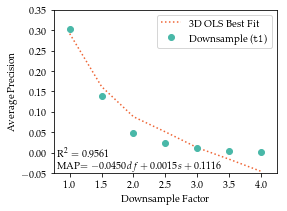

In [36]:
# create ols plot
plt.figure(figsize=fs125)
# plt.tight_layout()
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

# plt.plot(t07["df"], y, linestyle=":", color=accent_color, label="2D OLS Best Fit")
# plt.text(0.8,-0.01, "R^2: {:.4f}".format(model07.rsquared))
# plt.text(0.8, -0.04, "MAP$={:.4f}df+{:.4f}s{:.4f}$".format(model07.params["df"],
#                                                                          model07.params["area"],
#                                                                          model07.params["Intercept"]))

plt.plot(t07["df"], z07, linestyle=":", color=accent_color, label="3D OLS Best Fit")
plt.text(0.8,-0.01, "R$^2={:.4f}$".format(mod.rsquared))
plt.text(0.8, -0.04, "MAP$={:.4f}df+{:.4f}s+{:.4f}$".format(mod.params["df"],
                                                                         mod.params["area"],
                                                                         mod.params["Intercept"]))


plt.xlim([0.75,4.25])
plt.ylim([-0.05,0.35])
plt.xticks([1,1.5,2,2.5,3,3.5,4])

# plt.plot(t07["df"], t07["MAP"], color=main_color, linestyle='', marker='o', label="{}".format(name["t7"]))

plt.plot(t07["df"], t07["MAP"], color=secondary_color, linestyle='', marker='o', label="{}".format(name["t7"]))


plt.legend()
# plt.title("{}: AP by Downsample Factor".format(name["t7"]))
plt.xlabel("Downsample Factor")
plt.ylabel("Average Precision")
plt.savefig(image_path+"ols_ap_df_t7", dpi=300)

/Users/heidihurst/anaconda/envs/images27/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


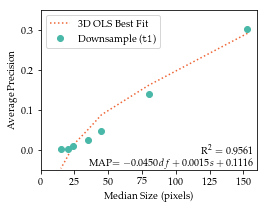

In [37]:
# create ols plot
plt.figure(figsize=fs125)
# plt.tight_layout()
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

# plt.plot(t07["area"], y, linestyle=":", color=accent_color, label="2D OLS Best Fit")

# plt.text(128,-0.01, "R^2: {:.4f}".format(model07.rsquared))
# plt.text(47, -0.04, "MAP$={:.4f}df+{:.4f}s{:.4f}$".format(model07.params["df"],
#                                                                          model07.params["area"],
#                                                                          model07.params["Intercept"]))

plt.plot(t07["area"], z07, linestyle=":", color=accent_color, label="3D OLS Best Fit")

plt.text(157,-0.01, "R$^2={:.4f}$".format(mod.rsquared), ha='right')
plt.text(157, -0.04, "MAP$={:.4f}df+{:.4f}s+{:.4f}$".format(mod.params["df"],
                                                                         mod.params["area"],
                                                                         mod.params["Intercept"]), ha='right')


plt.xlim([0,160])
plt.ylim([-0.05,0.35])
# plt.xticks([1,1.5,2,2.5,3,3.5,4])

plt.plot(t07["area"], t07["MAP"], color=secondary_color, linestyle='', marker='o', label="{}".format(name["t7"]))

plt.legend()
# plt.title("{}: AP by Median Size".format(name["t7"]))
plt.xlabel("Median Size (pixels)")
plt.ylabel("Average Precision")
plt.savefig(image_path+"ols_ap_as_t7", dpi=300)

In [38]:
"MAP={:.4f}df+{:.4f}s{:.4f}".format(model09.params["df"],
                                                                         model09.params["area"],
                                                                         model09.params["Intercept"])

'MAP=-0.0617df+0.0025s0.0000'

In [39]:
# create points for 3d plot
v_07 = [zip(t07["area"], t07["df"], y) + zip(t07["area"], t07["df"], [0.0]*7)[::-1]]

In [40]:
# plot
x1 = np.arange(-5, 165, 10)
y1 = np.arange(0.5, 4.75, 0.25)
X, Y = np.meshgrid(x1, y1)

Z = model07.params["df"] * Y + model07.params["area"] * X + model07.params["Intercept"]
# z1 = model07.params["df"] * y1 + model07.params["area"] * x1 + model07.params["Intercept"]

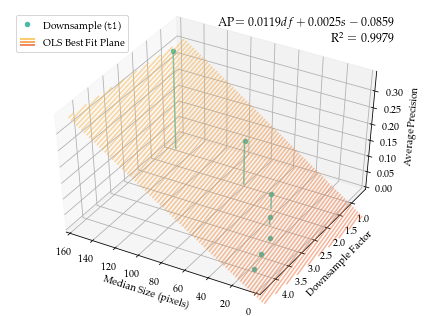

In [41]:
zlim07 = [-0.0,0.35]

# try to plot in 3d
fig = plt.figure(figsize=(4*1.5,3*1.5))
ax = fig.add_subplot(111, projection='3d')

#  === visualize plane ===
colors = [accent_tertiary_color, accent_secondary_color, accent_color]
cmap_name = "my_cmap"
my_cm = LinearSegmentedColormap.from_list(cmap_name, colors[::-1])#, N=n_bin)

ax.contour3D(X, Y, Z, 100, cmap=my_cm, alpha=0.5)#, label="_nolegend_")

# point drop lines
for i in range(len(total07)):
    ax.plot([list(total07["area"])[i]]*2, [list(total07["df"])[i]]*2, [list(total07["MAP"])[i],0], 
            color=secondary_color, alpha=0.8, label="_nolegend_")

# === line vis ===
# plot OLS 
# ax.plot(t07["area"], t07["df"], y, color=accent_color, linestyle="-", label="OLS Fit Model")

# scatterplot projected observations
# ax.plot(t07["area"], t07["df"], zdir="z", zs = zlim07[0], color=accent_secondary_color, linestyle="-.",label="_nolegend_")
# ax.scatter(t07["area"], t07["df"], zdir="z", zs = zlim07[0],  color=secondary_color, s=10, depthshade=False, label="_nolegend_")

# area = ax.plot(t07["area"], y, zdir='y', zs=0.5, color=accent_secondary_color, linestyle="-", label="AP by Size")
# ax.scatter(t07["area"], t07["MAP"], zdir='y', zs=0.5, color=secondary_color, s=10, depthshade=False, label="_nolegend_")

# df = ax.plot(t07["df"], y, zdir='x', zs=160, linestyle="-.", color=accent_secondary_color, label="AP by DF")
# ax.scatter(t07["df"], t07["MAP"], zdir='x', zs=160, color=secondary_color, s=10, depthshade=False, label="_nolegend_")

# ad 3d line
# create points for 3d plot
# v_07 = [zip(t07["area"], t07["df"], y) + zip(t07["area"], t07["df"], [zlim07[0]]*7)[::-1]]
# collection = Poly3DCollection(v_07, alpha=alpha)
# collection.set_facecolor(accent_secondary_color)
# ax.add_collection3d(collection)

# scatterplot observations
t7 = ax.scatter(t07["area"], t07["df"], t07["MAP"], color=secondary_color, depthshade=False, label=name["t7"])


ax.set_zlim(zlim07)

ax.set_xlim([0,160])
ax.set_ylim([0.5,4.5])
ax.set_yticks([1,1.5,2,2.5,3,3.5,4])

# ax.view_init(30,-70)
ax.view_init(45,120)

ax.set_xlabel("Median Size (pixels)")
ax.set_ylabel("Downsample Factor")
ax.set_zlabel("Average Precision")

# ax.legend(loc=2)
line = [[(0, 0)]]
lc = mcol.LineCollection(3 * line, linestyles='solid', colors=colors)#accent_secondary_color)

ax.legend([t7, lc], [name['t7'], 'OLS Best Fit Plane'], loc=2, 
          handler_map={type(lc): HandlerDashedLines()},
          handlelength=1.5, handleheight=1.5)

# add line of best fit
ax.text2D(0.95,0.95,"AP$={:.4f}df+{:.4f}s{:.4f}$".format(model07.params["df"],model07.params["area"],model07.params["Intercept"]), 
          transform=ax.transAxes, horizontalalignment='right', fontsize=12)
ax.text2D(0.95,0.89, "R$^2={:.4f}$".format(model07.rsquared),
         transform=ax.transAxes, horizontalalignment='right', fontsize=12)

plt.savefig(image_path + "ols_3d_t7", dpi=300)

### T9

In [42]:
# create line for OLS for t9
x = model09.params["df"] * t09["df"] + model09.params["area"] * total09["area"] + model09.params["Intercept"]

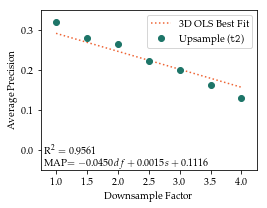

In [43]:
# plot 2d OLS results
plt.figure(figsize=fs125)

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

# plt.plot(t09["df"], x, linestyle=":", color=accent_color, label="2D OLS Best Fit")

# plt.text(0.80, 0.105, "MAP$={:.4f}df+{:.4f}area$".format(model09.params["df"],model09.params["area"]))
# plt.text(0.80, 0.12, "R^2: {:.4f}".format(model09.rsquared))
# # plt.text(0.55, 0.115, "$r^2$:{:.2f}".format(r_value**2))
# # plt.text(0.55, 0.105, "p-value:{:.2e}".format(p_value))
# plt.xlim([0.75,4.25])
# plt.ylim([0.1,0.35])

plt.plot(t09["df"], z09, linestyle=":", color=accent_color, label="3D OLS Best Fit")
plt.text(0.8,-0.01, "R$^2={:.4f}$".format(mod.rsquared))
plt.text(0.8, -0.04, "MAP$={:.4f}df+{:.4f}s+{:.4f}$".format(mod.params["df"],
                                                                         mod.params["area"],
                                                                         mod.params["Intercept"]))


plt.xlim([0.75,4.25])
plt.ylim([-0.05,0.35])
plt.xticks([1,1.5,2,2.5,3,3.5,4])


# plt.text(0.8,-0.02, "R^2: {:.4f}".format(x_coef[3]))
# plt.text(0.8, -0.04, "Equation: $MAP={:.4f}df+{:.4f}area+{:.4f}$".format(x_coef[0],x_coef[1],x_coef[2]))
# plt.xlim([0.75,4.25])
# plt.ylim([-0.05,0.35])
    
# plt.plot(ap05["df"], ap05["MAP"], color=secondary_color, lw=1, label='_nolegend_')
plt.plot(t09["df"], t09["MAP"], color=main_color, linestyle='', marker='o', label="{}".format(name["t9"]))

plt.legend()
# plt.title("{}: AP by Downsample Factor".format(name["t9"]))
plt.xlabel("Downsample Factor")
plt.ylabel("Average Precision")
plt.savefig(image_path+"ols_ap_df_t9", dpi=300)

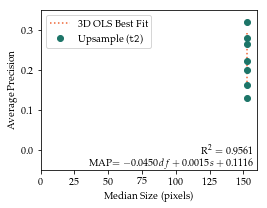

In [44]:
# plot 2d OLS results
plt.figure(figsize=fs125)

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

# plt.plot(total09["area"], x, linestyle=":", color=accent_color, label="2D OLS Best Fit")

# plt.text(153.5, 0.105, "MAP$={:.4f}df+{:.4f}area$".format(model09.params["df"],model09.params["area"]))
# plt.text(157.75, 0.12, "R^2: {:.4f}".format(model09.rsquared))
# # plt.text(0.55, 0.115, "$r^2$:{:.2f}".format(r_value**2))
# # plt.text(0.55, 0.105, "p-value:{:.2e}".format(p_value))
# plt.xlim([150,160])
# plt.ylim([0.1,0.35])

plt.plot(total09["area"], z09, linestyle=":", color=accent_color, label="3D OLS Best Fit")

plt.text(157,-0.01, "R$^2={:.4f}$".format(mod.rsquared), ha='right')
plt.text(157, -0.04, "MAP$={:.4f}df+{:.4f}s+{:.4f}$".format(mod.params["df"],
                                                                         mod.params["area"],
                                                                         mod.params["Intercept"]), ha='right')


plt.xlim([0,160])
plt.ylim([-0.05,0.35])

# plt.text(0.8,-0.02, "R^2: {:.4f}".format(x_coef[3]))
# plt.text(0.8, -0.04, "Equation: $MAP={:.4f}df+{:.4f}area+{:.4f}$".format(x_coef[0],x_coef[1],x_coef[2]))
# plt.xlim([0.75,4.25])
# plt.ylim([-0.05,0.35])
    
# plt.plot(ap05["df"], ap05["MAP"], color=secondary_color, lw=1, label='_nolegend_')
plt.plot(total09["area"], t09["MAP"], color=main_color, linestyle='', marker='o', label="{}".format(name["t9"]))

plt.legend()
# plt.title("{}: AP by Median Size".format(name["t9"]))
plt.xlabel("Median Size (pixels)")
plt.ylabel("Average Precision")
plt.savefig(image_path+"ols_ap_as_t9", dpi=300)

In [45]:
# create plane and plot
# plot
x2 = np.arange(-5, 165, 10)
y2 = np.arange(0.5, 4.75, 0.25)
X, Y = np.meshgrid(x2, y2)

Z = model09.params["df"] * Y + model09.params["area"] * X + model09.params["Intercept"]
# z = model09.params["df"] * y + model09.params["area"] * x + model09.params["Intercept"]

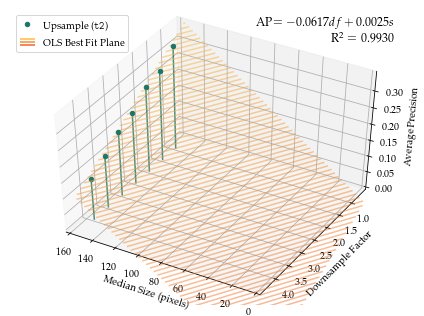

In [46]:
zlim09 = [-0.0,0.35]

# try to plot in 3d
fig = plt.figure(figsize=(4*1.5,3*1.5))
ax = fig.add_subplot(111, projection='3d')

#  === visualize plane ===
colors = [accent_tertiary_color, accent_secondary_color, accent_color]
cmap_name = "my_cmap"
my_cm = LinearSegmentedColormap.from_list(cmap_name, colors[::-1])#, N=n_bin)

ax.contour3D(X, Y, Z, 100, cmap=my_cm, alpha=0.5)#, label="_nolegend_")

# point drop lines
for i in range(len(total09)):
    ax.plot([list(total09["area"])[i]]*2, [list(total09["df"])[i]]*2, [list(total09["MAP"])[i],0], 
            color=main_color, alpha=0.8, label="_nolegend_")

# === line vis ===
# plot OLS 
# ax.plot(total09["area"], total09["df"], x, color=accent_color, linestyle="-", label="OLS Fit Model")

# scatterplot projected observations
# ax.plot(total09["area"], total09["df"], zdir="z", zs = zlim09[0], color=accent_secondary_color, linestyle="-.",label="_nolegend_")
# ax.scatter(total09["area"], total09["df"], zdir="z", zs = zlim09[0],  color=secondary_color, s=10, depthshade=False, label="_nolegend_")

# ax.plot(total09["area"], x, zdir='y', zs=0.5, color=accent_secondary_color, linestyle="-", label="AP by Size")
# ax.scatter(total09["area"], total09["MAP"], zdir='y', zs=0.5, color=secondary_color, s=10, depthshade=False, label="_nolegend_")

# ax.plot(total09["df"], x, zdir='x', zs=160, linestyle="--", color=accent_secondary_color, label="AP by DF")
# ax.scatter(total09["df"], total09["MAP"], zdir='x', zs=160, color=secondary_color, s=10, depthshade=False, label="_nolegend_")

# ad 3d line
# create points for 3d plot
# v_09 = [zip(total09["area"], total09["df"], y) + zip(total09["area"], total09["df"], [zlim09[0]]*7)[::-1]]
# collection = Poly3DCollection(v_09, alpha=alpha)
# collection.set_facecolor(accent_secondary_color)
# ax.add_collection3d(collection)

# scatterplot observations
t9 = ax.scatter(total09["area"], total09["df"], total09["MAP"], color=main_color, depthshade=False, label=name["t9"])


ax.set_zlim(zlim09)

ax.set_xlim([0,160])
ax.set_ylim([0.5,4.5])
ax.set_yticks([1,1.5,2,2.5,3,3.5,4])

# ax.view_init(30,-70)
ax.view_init(45,120)

ax.set_xlabel("Median Size (pixels)")
ax.set_ylabel("Downsample Factor")
ax.set_zlabel("Average Precision")

# ax.legend(loc=2)

line = [[(0, 0)]]
lc = mcol.LineCollection(3 * line, linestyles='solid', colors=colors)#accent_secondary_color)

ax.legend([t9, lc], [name['t9'], 'OLS Best Fit Plane'], loc=2, 
          handler_map={type(lc): HandlerDashedLines()},
          handlelength=1.5, handleheight=1.5)

# add line of best fit
ax.text2D(0.95,0.95,"AP$={:.4f}df+{:.4f}s$".format(model09.params["df"],model09.params["area"]),#,model09.params["Intercept"]), 
          transform=ax.transAxes, horizontalalignment='right', fontsize=12)
ax.text2D(0.95,0.89, "R$^2={:.4f}$".format(model09.rsquared),
         transform=ax.transAxes, horizontalalignment='right', fontsize=12)

plt.savefig(image_path + "ols_3d_t9", dpi=300)

### Percent Increase

In [47]:
diff = 100*(t09["MAP"]-t07["MAP"])/t07["MAP"]

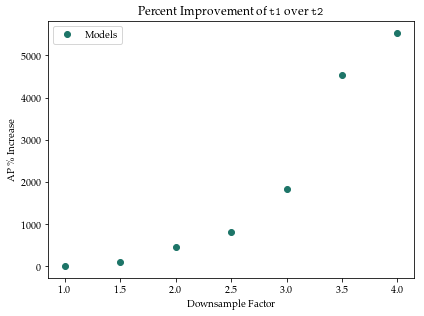

In [48]:
# plot 2d OLS results
plt.figure(figsize=(4*1.5,3*1.5))

# from matplotlib import rcParams
# rcParams.update({'figure.autolayout': True})

# plt.plot(total09["df"], diff, linestyle=":", color=accent_color, label="2D OLS Best Fit")

# plt.xlim([150,160])
# plt.ylim([0.1,0.35])
    
# plt.plot(ap05["df"], ap05["MAP"], color=secondary_color, lw=1, label='_nolegend_')
plt.plot(t07["df"], diff, color=main_color, linestyle='', marker='o', label="Models")
# plt.semilogy(t07["df"], diff, color=main_color, linestyle='', marker='o', label="{}".format(name["t9"]))

plt.legend()
plt.title("Percent Improvement of $\mathtt{t1}$ over $\mathtt{t2}$")
plt.xlabel("Downsample Factor")
plt.ylabel("AP \% Increase")
plt.savefig(image_path+"pct_improvement", dpi=300)

### Correlation Matrices

In [49]:
t07 = total07.loc[:,["df","MAP","area"]]
print t07.corr()
# a, b = stats.spearmanr(t07)

            df       MAP      area
df    1.000000 -0.841126 -0.871298
MAP  -0.841126  1.000000  0.997324
area -0.871298  0.997324  1.000000


In [69]:
t = total.loc[:,["df","MAP","area"]]
print t.corr()

            df       MAP      area
df    1.000000 -0.654210 -0.333715
MAP  -0.654210  1.000000  0.903401
area -0.333715  0.903401  1.000000


In [70]:
t09 = total09.loc[:,["df","MAP","area"]]
print t09.corr()
# stats.spearmanr(t09)

          df     MAP  area
df    1.0000 -0.9965   NaN
MAP  -0.9965  1.0000   NaN
area     NaN     NaN   NaN


## Precision Recall

In [163]:
# read in csvs
precision_path = ("/Users/heidihurst/Documents/UK/ucl-gis/dissertation/analysis/precision.csv")
recall_path = "/Users/heidihurst/Documents/UK/ucl-gis/dissertation/analysis/recall.csv"

In [164]:
precision = pd.read_csv(precision_path, names=["precision"])
recall = pd.read_csv(recall_path, names=["recall"])

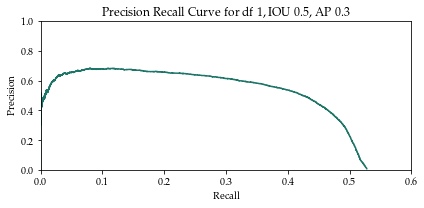

In [172]:
plt.figure(figsize=(6,3))
plt.step(recall, precision, color=main_color, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 0.6])
plt.title("Precision Recall Curve for df {}, IOU {}, AP {}".format(1, 0.5, 0.3))
plt.tight_layout()
plt.savefig(image_path + "pr_curve_example", dpi=300)

In [54]:
test_path = "/Users/heidihurst/Documents/UK/ucl-gis/dissertation/analysis/test.csv"
test = pd.read_csv(test_path, header=None).T

## PR Curves for Everything

In [55]:
# import all
import csv
pr_path = "/Users/heidihurst/Documents/UK/ucl-gis/dissertation/analysis/{}_pr/"

In [56]:
pr = {}
factors = ["1", "1.5", "2", "2.5", "3", "3.5", "4"]
trial="t7"
object_type="car"

In [57]:
# read in each factor's information to dictionary
for factor in factors:
    csv_name=pr_path.format(trial) + "{}_{}_{}_".format(object_type,trial,factor)
    pr[factor]={}
    with open(csv_name+"precision.csv", 'rb') as f:
        reader = csv.reader(f)
        pr[factor]['precision'] = list(reader)
    with open(csv_name+"recall.csv", 'rb') as f:
        reader = csv.reader(f)
        pr[factor]['recall'] = list(reader)

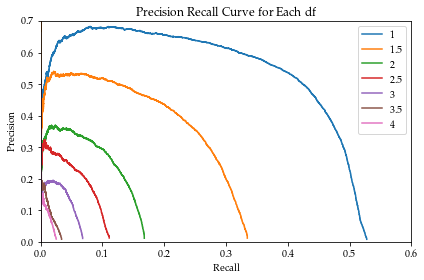

In [58]:
# plot them all on top of each other
plt.figure()
for factor in factors:
    plt.step(pr[factor]["recall"], pr[factor]["precision"], where='post', label=factor)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 0.7])
plt.xlim([0.0, 0.6])
plt.legend()
plt.title("Precision Recall Curve for Each df")
plt.show()

In [59]:
test2 = "/Users/heidihurst/Documents/UK/ucl-gis/dissertation/analysis/new2.csv"
new = pd.read_csv(test2)

In [12]:
k = full_bbox_info("t7")

In [22]:
k.sort_values(by=['df','stat'])

,trial,stat,height,width,area,test,df
20,car_t7_1,25%,9.000000,11.000000,112.000000,0.000000,1
21,car_t7_1,50%,12.000000,14.000000,153.000000,0.000000,1
22,car_t7_1,75%,15.000000,17.000000,204.000000,0.000000,1
16,car_t7_1,count,211664.000000,211664.000000,211664.000000,211664.000000,1
23,car_t7_1,max,394.000000,756.000000,139104.000000,1.000000,1
17,car_t7_1,mean,12.046130,13.875170,167.937183,0.068557,1
19,car_t7_1,min,0.000000,0.000000,0.000000,0.000000,1
18,car_t7_1,std,3.989833,5.013003,383.327748,0.252700,1
28,car_t7_1.5,25%,7.000000,8.000000,60.000000,0.000000,1.5
29,car_t7_1.5,50%,9.000000,10.000000,80.000000,0.000000,1.5


In [47]:
str(1)

'1'

In [50]:
i = 0
zs = k[k['df'] == str(1+0.5*i)]
zmean = zs[zs['stat'] == "mean"]
zstd = zs[zs['stat'] == "std"]
zh.append((8.0-zmean['height'])/zstd['height'])
zw.append((8.0-zmean['width'])/zstd['width'])

In [42]:
zs[zs['stat'] == "count"]['height']

16    211664.32
Name: height, dtype: float64

In [128]:
# calculate z score of value 8 for height or width and then plot?
# 
zh = []
zw = []
za = []
f = ["1","1.5","2","2.5","3","3.5","4"]
for i in f:
    zs = k[k['df'] == i]
    zmean = zs[zs['stat'] == "mean"]
    zstd = zs[zs['stat'] == "std"]
    zh.extend((8.0-zmean['height'].values)/zstd['height'].values)
    zw.extend((8.0-zmean['width'].values)/zstd['width'].values)
    za.extend((64.0-zmean['area'].values)/zstd['area'].values)

In [80]:
from scipy.special import ndtr

In [112]:
k50 = k[k["stat"] == '50%']

In [113]:
k50["df"].values

array(['4', '2.5', '1', '1.5', '3', '2', '3.5'], dtype=object)

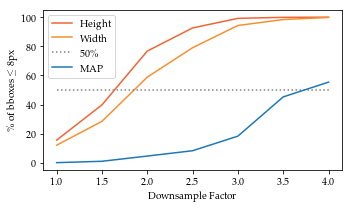

In [162]:
plt.figure(figsize=(5,3))
ff = [float(p) for p in f]
plt.plot(ff, 100*ndtr(zh), color=accent_color, label="Height")
plt.plot(ff, 100*ndtr(zw), color=accent_secondary_color, linestyle="-", label="Width")
plt.plot(ff, [50]*len(ff), linestyle=":", color="gray", label="50\%")
# plt.plot(ff, 1-ndtr(za), label="area")

# plt.plot(total07["df"],total07["MAP"], color=secondary_color, lw=2.5, linestyle=":", label=name["t7"])

# add 50th percentile points to see if we're correct here
# plt.scatter(k50["df"].values, k50["height"].values-7.5)

plt.xlabel("Downsample Factor")
plt.ylabel("\% of bboxes $\leq$ 8px")
plt.legend()

plt.tight_layout()

# plt.savefig(image_path + "bbox_percentile_hw_t7", dpi=300)
plt.show()

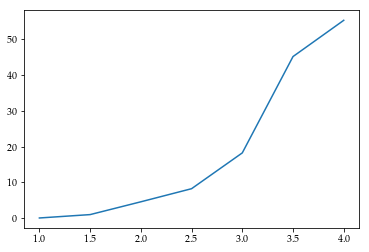

In [160]:
plt.plot(ff, (total09["MAP"] - total07["MAP"])/total07["MAP"])

In [130]:
# correllation between height inverse % thingy and AP
hc = np.array([zh, zw, za, total07["MAP"].values])

In [136]:
hc = pd.DataFrame({"zh":zh,"zw":zw,"za":za,"MAP":total07["MAP"].values})
hc.corr()

,MAP,za,zh,zw
MAP,1.000000,-0.734189,-0.846334,-0.842012
za,-0.734189,1.000000,0.980634,0.982398
zh,-0.846334,0.980634,1.000000,0.999956
zw,-0.842012,0.982398,0.999956,1.000000


In [13]:
plt.hist(put_data_here, normed=True, cumulative=True, label='CDF', histtype='step', alpha=0.8, color='k')

,trial,stat,height,width,area,test,df
0,car_t7_4,count,211664.000000,211664.000000,211664.000000,211664.000000,4
1,car_t7_4,mean,3.760857,4.217330,15.909682,0.068557,4
2,car_t7_4,std,1.073997,1.315278,24.966448,0.252700,4
3,car_t7_4,min,1.000000,1.000000,1.000000,0.000000,4
4,car_t7_4,25%,3.000000,3.000000,12.000000,0.000000,4
5,car_t7_4,50%,4.000000,4.000000,15.000000,0.000000,4
6,car_t7_4,75%,4.000000,5.000000,20.000000,0.000000,4
7,car_t7_4,max,99.000000,190.000000,8930.000000,1.000000,4
8,car_t7_2.5,count,211664.000000,211664.000000,211664.000000,211664.000000,2.5
9,car_t7_2.5,mean,5.618164,6.350456,35.805976,0.068557,2.5


In [60]:
k = full_bbox_info("t7")
k[k["stat"] == "50%"]

,trial,stat,height,width,area,test,df
5,car_t7_4,50%,4.0,4.0,15.0,0.0,4
13,car_t7_2.5,50%,6.0,6.0,35.0,0.0,2.5
21,car_t7_1,50%,12.0,14.0,153.0,0.0,1
29,car_t7_1.5,50%,9.0,10.0,80.0,0.0,1.5
37,car_t7_3,50%,5.0,5.0,24.0,0.0,3
45,car_t7_2,50%,6.0,7.0,45.0,0.0,2
53,car_t7_3.5,50%,4.0,5.0,20.0,0.0,3.5


In [61]:
total

,df,IOU,MAP,MAP Score,MAF,F1,trial,stat,height,width,area,test
0,1.0,0.5,0.302859,0.008296,0.527806,0.016335,car_t7_1,50%,12.0,14.0,153.0,0.0
1,1.5,0.5,0.139614,0.012037,0.334505,0.023238,car_t7_1.5,50%,9.0,10.0,80.0,0.0
2,2.0,0.5,0.047519,0.011679,0.167804,0.021837,car_t7_2,50%,6.0,7.0,45.0,0.0
3,2.5,0.5,0.023943,0.012562,0.111088,0.022572,car_t7_2.5,50%,6.0,6.0,35.0,0.0
4,3.0,0.5,0.010363,0.011070,0.068086,0.019044,car_t7_3,50%,5.0,5.0,24.0,0.0
5,3.5,0.5,0.003536,0.008500,0.033974,0.013598,car_t7_3.5,50%,4.0,5.0,20.0,0.0
6,4.0,0.5,0.002325,0.008976,0.025360,0.013259,car_t7_4,50%,4.0,4.0,15.0,0.0
0,1.0,0.5,0.319781,0.008637,0.549514,0.017006,car_t9_1,50%,12.0,14.0,153.0,0.0
1,1.5,0.5,0.279437,0.008193,0.521260,0.016132,car_t9_1.5,50%,12.0,14.0,153.0,0.0
2,2.0,0.5,0.265252,0.007912,0.503411,0.015580,car_t9_2,50%,12.0,14.0,153.0,0.0


In [63]:
total09

,df,IOU,MAP,MAP Score,MAF,F1,trial,stat,height,width,area,test
0,1.0,0.5,0.319781,0.008637,0.549514,0.017006,car_t9_1,50%,12.0,14.0,153.0,0.0
1,1.5,0.5,0.279437,0.008193,0.521260,0.016132,car_t9_1.5,50%,12.0,14.0,153.0,0.0
2,2.0,0.5,0.265252,0.007912,0.503411,0.015580,car_t9_2,50%,12.0,14.0,153.0,0.0
3,2.5,0.5,0.221438,0.007543,0.479912,0.014852,car_t9_2.5,50%,12.0,14.0,153.0,0.0
4,3.0,0.5,0.199661,0.007272,0.462683,0.014319,car_t9_3,50%,12.0,14.0,153.0,0.0
5,3.5,0.5,0.163451,0.006875,0.437392,0.013536,car_t9_3.5,50%,12.0,14.0,153.0,0.0
6,4.0,0.5,0.131045,0.006271,0.399008,0.012349,car_t9_4,50%,12.0,14.0,153.0,0.0


In [66]:
r = (total09['MAP']-0.319781)/0.319781 * 100

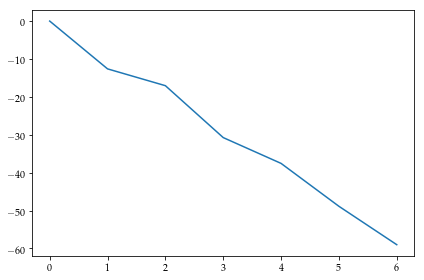

In [67]:
plt.plot(r)

In [68]:
r


0     0.000042
1   -12.616038
2   -17.052109
3   -30.753111
4   -37.563279
5   -48.886435
6   -59.020385
Name: MAP, dtype: float64

In [12]:
total09.to_csv("total09_csv.csv")

In [13]:
total07.to_csv("total07_csv.csv")

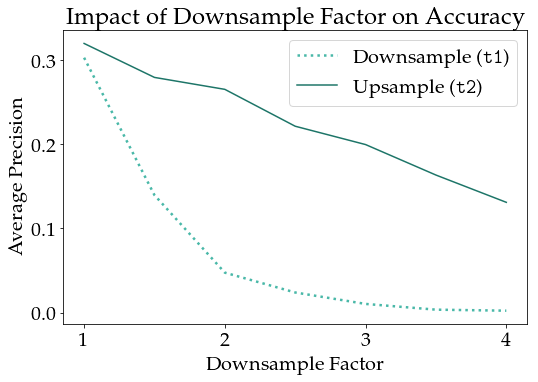

In [78]:
plt.figure(figsize=cm2inch((20,14.5)))
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True, 'font.size':20})

plt.plot(total07["df"],total07["MAP"], color=secondary_color, lw=2.5, linestyle=":", label=name["t7"])
plt.plot(total09["df"], total09["MAP"], color=main_color, linestyle="-", label=name["t9"])

plt.yticks([0,0.1, 0.2,0.3])
plt.xticks([1,2,3,4])

plt.title("Impact of Downsample Factor on Accuracy")
plt.xlabel("Downsample Factor")
plt.ylabel("Average Precision")

plt.legend()
plt.savefig(image_path + "ap_df_both_simple", dpi=300)

In [22]:
image_path

'/Users/heidihurst/Documents/UK/ucl-gis/dissertation/writeup/16819348ghkbpztpjpfj/Figures/'